In [1]:
from functools import partial
from pathlib import Path

import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import distance_metrics
from tabulate import tabulate

from src.clustering import get_agglomerative, get_em, get_kmeans, get_spectral
from src.compare import pairwice_adjusted_rand_score
from src.num_clusters.elbow_rule import elbow_rule
from src.num_clusters.silhouette_method import silhouette_method
from src.utils import convert_distance_to_similarity

In [2]:
x_path = Path('data/X_4_1.xlsx')
y_path = Path('data/Y_4_1.xlsx')

x_data = pd.read_excel(x_path, header=None)
y_data = pd.read_excel(y_path, header=None)

## Distances

- Euclidean
- Cosine


In [3]:
distance_metrics_dict = distance_metrics()

euclidean_distance_func = distance_metrics_dict['euclidean']
cosine_distance_func = distance_metrics_dict['cosine']

In [4]:
euclidean_distance_x = euclidean_distance_func(x_data)
cosine_distance_y = cosine_distance_func(y_data)

euclidean_similarity_x = convert_distance_to_similarity(euclidean_distance_x)

In [5]:
graph = nx.from_numpy_array(cosine_distance_y)

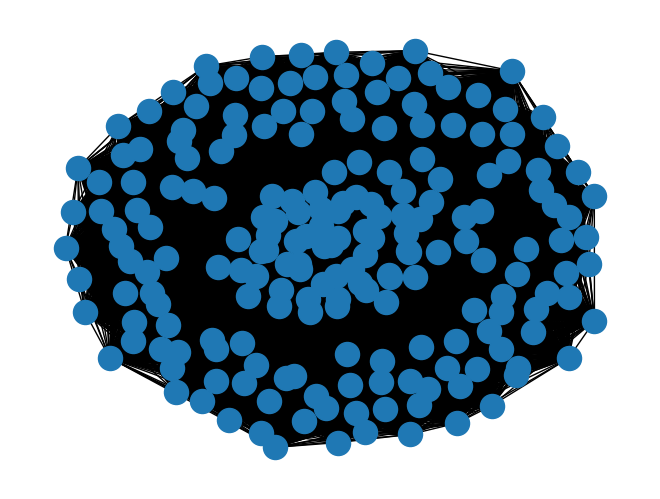

In [6]:
nx.draw(graph)

## Clustering algorithms

- AgglomerativeClustering
- K-Means
- Spectral Clustering
- Gaussian Mixture (EM)

In [7]:
get_clustering_named_list = [
    ('Agglomerative Single Linkage', partial(get_agglomerative,
                                             linkage='single',
                                             matrix=euclidean_distance_x)
    ),
    ('KMeans', get_kmeans),
    ('Spectral', get_spectral), # Similarity matrix must be passed to fit
    ('EM Gaussian Mixture', get_em),
]

In [8]:
cluster_results_dict = {}

for n_clusters in [2, 3]:
    result_dict = {}

    for clustering_name, clustering_getter in get_clustering_named_list:
        clustering = clustering_getter(n_clusters=n_clusters)
        result = clustering.fit_predict(x_data) if clustering_name != 'Spectral' \
                                                else clustering.fit_predict(euclidean_distance_x)
        result_dict[clustering_name] = result
    cluster_results_dict[n_clusters] = result_dict

In [9]:
for num_clusters, result_dict in cluster_results_dict.items():
    table = pairwice_adjusted_rand_score(result_dict)
    print(f'Num Clusters Is {num_clusters}\n', tabulate(table, headers='keys', tablefmt='psql'))

Num Clusters Is 2
 +------------------------------+--------------------------------+-------------+-------------+-----------------------+
|                              |   Agglomerative Single Linkage |      KMeans |    Spectral |   EM Gaussian Mixture |
|------------------------------+--------------------------------+-------------+-------------+-----------------------|
| Agglomerative Single Linkage |                     1          |  0.0321474  | -0.00862373 |            0.0384111  |
| KMeans                       |                     0.0321474  |  1          | -0.00113211 |            0.960201   |
| Spectral                     |                    -0.00862373 | -0.00113211 |  1          |           -0.00148144 |
| EM Gaussian Mixture          |                     0.0384111  |  0.960201   | -0.00148144 |            1          |
+------------------------------+--------------------------------+-------------+-------------+-----------------------+
Num Clusters Is 3
 +-----------------

## Number of clusters

- The elbow rule
- The Silhouette Method

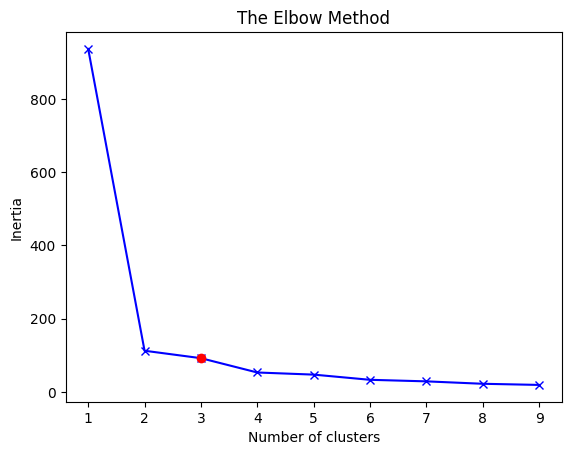

In [10]:
elbow_rule(cosine_distance_y, 10)
pass

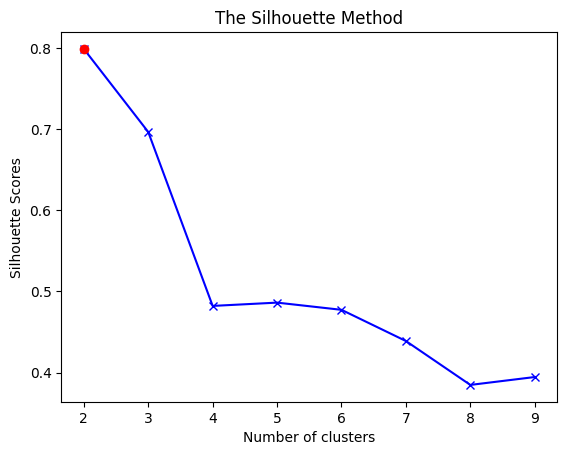

In [11]:
silhouette_method(cosine_distance_y, 10)
pass